In [3]:
import torch

from micrograd.nn import MLP
from micrograd.engine import Value
from micrograd.viz import draw_dot

## Micrograd

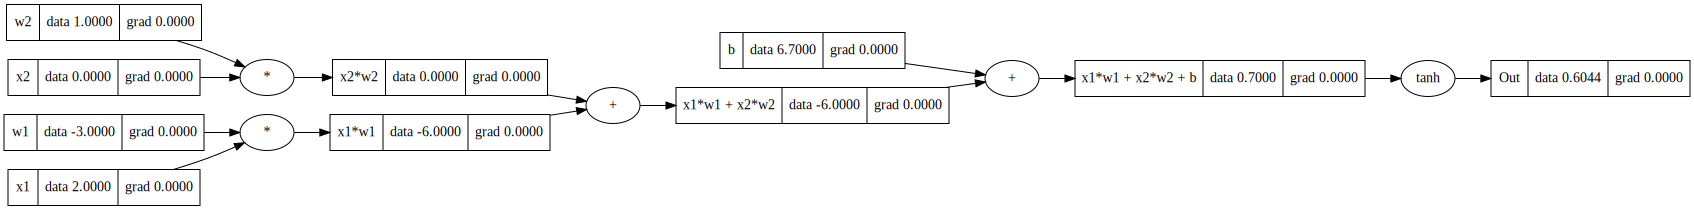

In [6]:
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
b = Value(6.7, label = 'b')

x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'

x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'x1*w1 + x2*w2 + b'

o = n.tanh(); o.label = 'Out'
draw_dot(o)

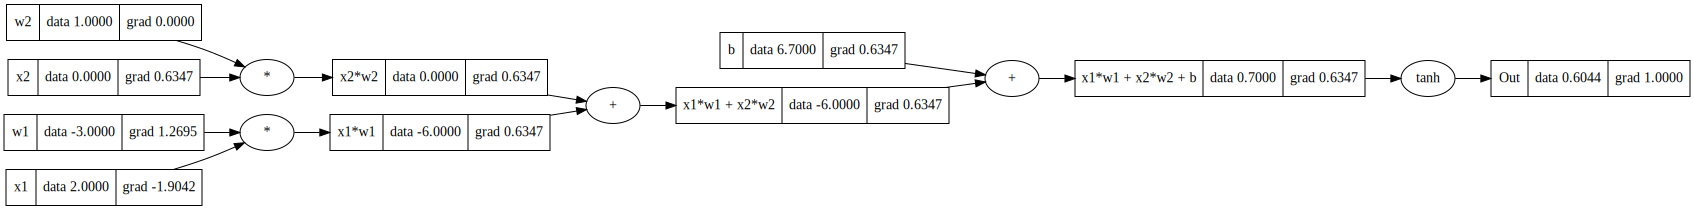

In [8]:
o.backward()
draw_dot(o)

## Autograd (PyTorch Inbuilt Auto Differential)

In [11]:
x1 = torch.tensor([2.0]); x1.requires_grad = True
x2 = torch.tensor([0.0]); x2.requires_grad = True
w1 = torch.tensor([-3.0]); w1.requires_grad = True
w2 = torch.tensor([1.0]); w2.requires_grad = True
b = torch.tensor([6.7]); b.requires_grad = True

x1w1 = x1*w1
x2w2 = x2*w2
x1w1x2w2 = x1w1 + x2w2
n = x1w1x2w2 + b

o = torch.tanh(n)
o.backward()

In [21]:
for ele, val in {'x1': x1, 'x2': x2, 'w1': w1, 'w2': w2, 'b': b}.items():
    print(ele, '\t : ', val.grad)

x1 	 :  tensor([-1.9042])
x2 	 :  tensor([0.6347])
w1 	 :  tensor([1.2695])
w2 	 :  tensor([0.])
b 	 :  tensor([0.6347])
